## Q.1 . For the function J(w) = w^2 + (54/w), implement the following methods: 

### (a). Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method.

In [7]:
def bracketing_method(J, a, b, n):
    
    delta_w = (b-a)/n
    w1 = a
    w2 = a + delta_w
    w3 = a + 2*delta_w

    # Step -2
    flag = 0
    while flag !=1:
        if J(w1) >= J(w2) <= J(w3):
            print('Critical point lies between', w1, 'and', w3)
            flag =1
        else:
            # Update points for the next iteration
            w1 = w2
            w2 = w3
            w3 = w3 + delta_w

        if w3 > b:
            print('No minimum exists between a, b')
            flag = 1
    

def J(w):
    return w**2 + (54/w)

# Set the interval [a, b] and the number of intermediate points (n)
a = 1
b = 5
n = 500

bracketing_method(J, a, b, n)

Critical point lies between 2.9920000000000018 and 3.008000000000002


In [23]:
def J(w):
    return w**2 + (54/w)
def Interval_Halving_Method(lwr_bound, upr_bound, J, epsilon=1e-4):
    a = lwr_bound
    b = upr_bound
    
    while True:
        x_m = (a + b) / 2
        L = (b - a)
        x_1 = a + L / 4
        x_2 = b - L / 4
        
        if J(x_1) < J(x_m):
            b = x_m
            x_m = x_1
            
        elif J(x_2) < J(x_m):
            a = x_m
            x_m = x_2
            
        else:
            a = x_1
            b = x_2
        
        L = b - a
        if abs(L) < epsilon:
            print('Critical point is', x_m)
            break

a = 1
b = 5
Interval_Halving_Method(a, b, J)

Critical point is 3.0


### (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [11]:
# function J(w)
def J(w):
    return w**2 + (54/w)
    
# Derivative J(w)
def der_J(w):
    return 2*w - (54/w**2)

# Second Derivative J(w)
def second_der_J(w):
    return 2 + (108/w**3)

# Newton-Raphson method
def Newton_Raphson(initial_guess, J, der_J, second_der_J, max_steps, epsilon=1e-8):
    x_i = initial_guess
    for i in range(max_steps):
        x_new = x_i - der_J(x_i) / second_der_J(x_i)
        if abs(J(x_new) - J(x_i)) < epsilon:
            return x_new
        x_i = x_new
    return x_i
    
x_0 = 1.0
N_steps = 1000
result = Newton_Raphson(x_0, J, der_J, second_der_J, N_steps)

print("Result:", result)

Result: 2.9999999999999982


## Q.2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.



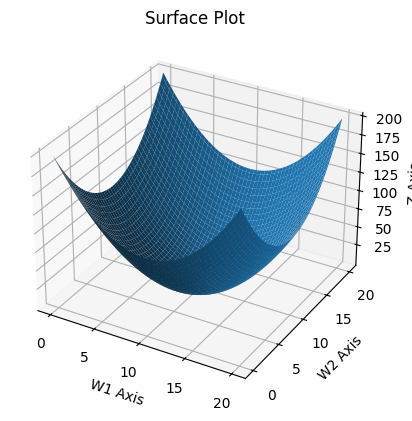

In [37]:
# J(w1,w2) = (w1-10)^2 + (w2-10)^2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)

# The following will print a 3D surface
W1,W2=np.meshgrid(x,y)
Z = (W1-10)**2 + (W2-10)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z)
ax.set_xlabel('W1 Axis')
ax.set_ylabel('W2 Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Surface Plot')

plt.show()

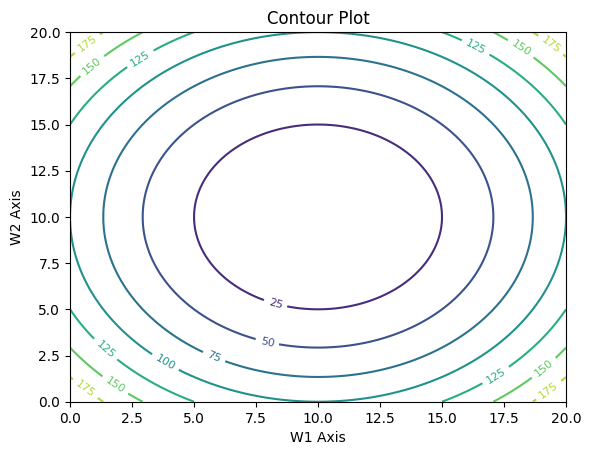

In [40]:
# Contour plot
# J(w1,w2) = (w1-10)^2 + (w2-10)^2

fig, ax = plt.subplots()

cp = ax.contour(W1, W2, Z)
plt.clabel(cp, fontsize=8)
ax.set_xlabel('W1 Axis')
ax.set_ylabel('W2 Axis')
ax.set_title('Contour Plot')

plt.show()

## Q.3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.



In [2]:
import numpy as np

def bracketing_method(J, a, b, n):
    
    delta_w = (b - a) / n
    w1 = a
    w2 = a + delta_w
    w3 = a + 2 * delta_w

    # Step -2
    flag = 0
    while flag != 1:
        if J(w1) >= J(w2) <= J(w3):
            print('alpha value lies between', w1, 'and', w3)
            flag = 1
        else:
            # Update points for the next iteration
            w1 = w2
            w2 = w3
            w3 = w3 + delta_w

        if w3 > b:
            print('No minimum exists between a, b')
            flag = 1
    alpha_1 = w1
    alpha_2 = w2
    return alpha_1, alpha_2

def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

Start_pt = np.array([2, 1])

# Search direction
p = np.array([2, 5])

# Univariate function
def J_alpha(alpha):
    return J(Start_pt[0] + alpha * p[0], Start_pt[1] + alpha * p[1])

a = 1
b = 5
n = 500

# Call the bracketing_method function
alpha_1, alpha_2 = bracketing_method(J_alpha, a, b, n)

A = Start_pt + alpha_1 * p
B = Start_pt + alpha_2 * p

# Print or use the result obtained from the bracketing method
J_A = J(A[0], A[1])
J_B = J(B[0], B[1])

print("Minimum value of J(w1,w2) lies in intervals", A , " and ", B)

print("Minimum value of J(w1,w2) lies between range", J_A , " and ", J_B)


alpha value lies between 2.096000000000001 and 2.112000000000001
Minimum value of J(w1,w2) lies in intervals [ 6.192 11.48 ]  and  [ 6.208 11.52 ]
Minimum value of J(w1,w2) lies between range 16.691263999999997  and  16.689664


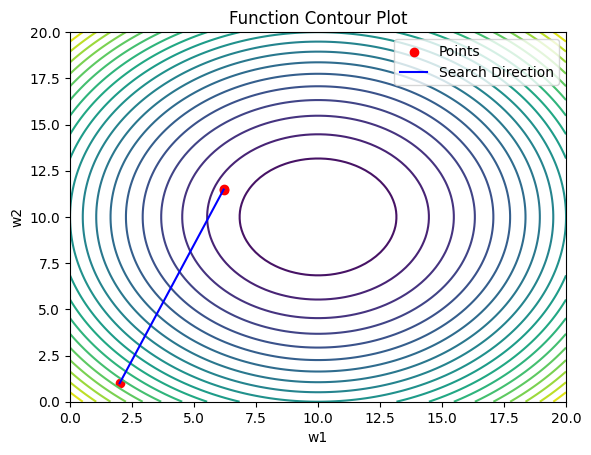

In [63]:
# Plotting
x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)
Z = J(X, Y)

plt.contour(X, Y, Z, levels=20)
plt.scatter([Start_pt[0], A[0], B[0]], [Start_pt[1], A[1], B[1]], c='red', marker='o', label='Points')
plt.plot([Start_pt[0], A[0]], [Start_pt[1], A[1]], 'b-', label='Search Direction')
plt.title('Function Contour Plot')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.show()

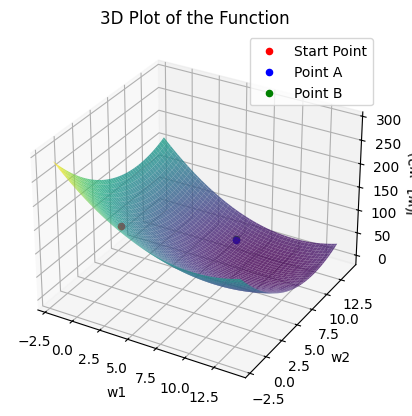

In [60]:
# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 14, 100)
y = np.linspace(-2, 14, 100)
X, Y = np.meshgrid(x, y)
Z = J(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(Start_pt[0], Start_pt[1], J(Start_pt[0], Start_pt[1]), c='red', marker='o', label='Start Point')
ax.scatter(A[0], A[1], J(A[0], A[1]), c='blue', marker='o', label='Point A')
ax.scatter(B[0], B[1], J(B[0], B[1]), c='green', marker='o', label='Point B')

ax.set_title('3D Plot of the Function')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w1, w2)')
ax.legend()

plt.show()